In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Features: {data.feature_names}")
print(f"Classes: {data.target_names}")

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Classes: ['malignant' 'benign']


In [3]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.49%


In [4]:
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)

y_pred_rbf = clf_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy: {accuracy_rbf * 100:.2f}%")

RBF Kernel Accuracy: 93.57%


In [5]:
clf_c = SVC(kernel='linear', C=0.1)
clf_c.fit(X_train, y_train)

y_pred_c = clf_c.predict(X_test)
accuracy_c = accuracy_score(y_test, y_pred_c)
print(f"Linear Kernel with C=0.1 Accuracy: {accuracy_c * 100:.2f}%")

Linear Kernel with C=0.1 Accuracy: 96.49%


Confusion Matrix:
[[ 59   4]
 [  2 106]]


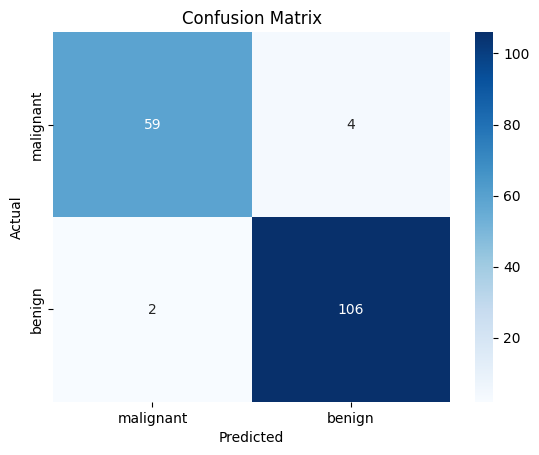

In [6]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [7]:
scores = cross_val_score(clf, X, y, cv=5)
print(f"Cross-validation accuracy: {np.mean(scores) * 100:.2f}%")

Cross-validation accuracy: 94.55%


In [8]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only for poly kernel
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

y_pred_best = grid_search.best_estimator_.predict(X_test)
print(f"Best model accuracy: {accuracy_score(y_test, y_pred_best) * 100:.2f}%")

Best parameters found: {'C': 10, 'degree': 2, 'kernel': 'linear'}
Best model accuracy: 97.08%
